# Machine learning program " Football Player Value"


In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np

print("Tensorflow version: "+tf.__version__)

Tensorflow version: 2.9.2


## Datasets

In [ ]:
# Google file system
from google.colab import drive
drive.mount('/GoogleDrive', force_remount=True)

ATT_FILE =   "/GoogleDrive/My Drive/Colab Notebooks/datasets/Fifa/FootballPlayerPreparedCleanAttributes.csv"
LABEL_FILE = "/GoogleDrive/My Drive/Colab Notebooks/datasets/Fifa/FootballPlayerOneHotEncodedClasses.csv"

attributes = pd.read_csv(ATT_FILE)


label =      pd.read_csv(LABEL_FILE)

Mounted at /GoogleDrive


Data exploration

In [ ]:
medians= []
averages= []

for column in attributes:
  medians.append(attributes[column].median())
  averages.append(attributes[column].mean())
print(medians)
print(averages)

[-0.2800000000000002, 0.0975609756097561, -0.0117647058823529, 0.0886075949367088, 0.2054794520547944, -0.0749999999999999, 0.1807228915662651, -0.0120481927710842, -0.1904761904761907, 0.0540540540540539, 0.0985915492957747, 0.0933333333333334, 0.1604938271604938, 0.1884057971014494, 0.036144578313253, 0.1707317073170731, 0.0952380952380951, 0.0975609756097561, 0.0540540540540539, 0.0952380952380951, 0.1807228915662653, 0.1358024691358024]
[-0.27957821610222083, 0.053536903065346274, -0.0644176390317944, 0.06494152969682118, 0.16829381445926853, -0.08137327874953472, 0.12265362155731234, -0.030012121429521473, -0.1325370242378059, 0.0027509832124644157, 0.07609058394530444, 0.09879998345945504, 0.1259654394501187, 0.16917022198490142, -0.025505819332409547, 0.13614482255726912, 0.04341745381938903, 0.06021918239279156, 0.03649704784799681, -0.016355940713960924, 0.010054359604402156, -0.021364870639154283]


Train Test Division

In [ ]:

TRAIN_RATIO = 0.8

n_instances = attributes.shape[0]
print(n_instances) #Number of rows in the attributes csv
n_train = int(n_instances*TRAIN_RATIO) #80% of data goes to training
n_dev = int((n_instances - n_train)/2) #10% of data goes to dev/validation

x_train = attributes.values[:n_train] #transforms each entry into an array [[row 1], [row 2],...]
t_train = label.values[:n_train]
x_dev =   attributes.values[n_train:n_train + n_dev]
t_dev =   label.values[n_train:n_train + n_dev]

INPUTS =  x_train.shape[1] #amount of attributes
OUTPUTS = t_train.shape[1] #amount of labels


NUM_TRAINING_EXAMPLES = int(round(x_train.shape[0]/1))
NUM_DEV_EXAMPLES =      int(round(x_dev.shape[0]/1))

print ("Number of training examples: ", NUM_TRAINING_EXAMPLES)
print ("Number of examples for development test: ", NUM_DEV_EXAMPLES)

16122
Number of training examples:  12897
Number of examples for development test:  1612


## Model


In [ ]:
n_neurons_per_hidden_layer = [ 80,80,80] #four layers
learning_rate = 0.001
opt = tf.keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.001, amsgrad=True, clipnorm=1.0, clipvalue=0.5)

In [ ]:
model = keras.Sequential(name="my_model")

my_initializer= keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)
model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="relu",kernel_initializer = my_initializer))
model.add(tf.keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=["categorical_accuracy"])


## Training

In [ ]:
n_epochs = 500
batch_size = 256
start_time = time.perf_counter()

In [ ]:
history = model.fit(x_train, t_train,
                    batch_size = batch_size,
                    epochs=n_epochs,
                    verbose = 0,
                    validation_data = (x_dev, t_dev))


In [ ]:
best_idx = int(np.argmax(history.history['categorical_accuracy']))
best_value = np.max(history.history['categorical_accuracy'])
print('Best validation model: epoch ' + str(best_idx+1), ' - categorical_accuracy ' + str(best_value))

best_idx_v = int(np.argmax(history.history['val_categorical_accuracy']))
best_value_v = np.max(history.history['val_categorical_accuracy'])
print('Best validation model: epoch ' + str(best_idx_v+1), ' - val_categorical_accuracy ' + str(best_value_v))

Best validation model: epoch 485  - categorical_accuracy 0.8972629308700562
Best validation model: epoch 43  - val_categorical_accuracy 0.8796526193618774


## Results

         loss  categorical_accuracy  val_loss  val_categorical_accuracy
0    1.145638              0.503373  0.806603                  0.625310
1    0.658722              0.712104  0.508882                  0.769851
2    0.489916              0.792432  0.425932                  0.821960
3    0.429925              0.819726  0.387734                  0.826303
4    0.399501              0.833527  0.370053                  0.839330
..        ...                   ...       ...                       ...
495  0.262375              0.895635  0.309414                  0.870968
496  0.260246              0.896798  0.309450                  0.869727
497  0.261363              0.895557  0.309864                  0.872208
498  0.261078              0.897030  0.310396                  0.869727
499  0.260945              0.896410  0.309590                  0.869727

[500 rows x 4 columns]


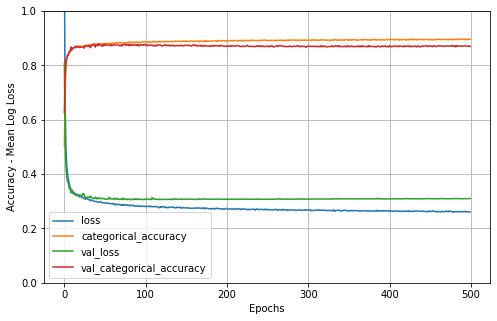

In [ ]:
results = pd.DataFrame(history.history)
print(results)
results.plot(figsize = (8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0,1]
plt.show()

In [ ]:
bayes_error =0.1
print(results.categorical_accuracy.values[-1:])
print ("Error (training): ",
       round((1 - results.categorical_accuracy.values[-1:][0])*100, 1), "%")
print ("Error (development test): ",
       round((1 - results.val_categorical_accuracy.values[-1:][0])*100, 1), "%")
print ("Time: ",
       round((time.perf_counter() - start_time)),"seconds")
print('Bias estimation: ',
      round((1 - results.categorical_accuracy.values[-1:][0]-bayes_error)*100, 1),'%')
print('Variance estimation: ',
      round((1 - results.val_categorical_accuracy.values[-1:][0]-(1-results.categorical_accuracy.values[-1:][0]))*100, 1),'%')

[0.89640999]
Error (training):  10.4 %
Error (development test):  13.0 %
Time:  133 seconds
Bias estimation:  0.4 %
Variance estimation:  2.7 %




```
# This is formatted as code
```

## Test

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_dev, t_dev)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions ")
predictions = model.predict(x_dev)
print("predictions shape:", predictions.shape)

In [ ]:
dev_rounded_predictions=np.round(predictions)
indices = np.argmax(predictions,1)
for row, index in zip(dev_rounded_predictions, indices): row[index]=1
dev_rounded_predictions[:20]

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(t_dev.argmax(axis=1),dev_rounded_predictions.argmax(axis=1))

import seaborn as sns
sns.heatmap(cm,  fmt='',annot=True)